# 2. Feature Engineering
---

### Import necessary Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Data preprocessing

In [14]:
data = pd.read_csv('housing.csv')

In [15]:
# Split the data into features and target

x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [16]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Join the features and target for training and Test data
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)


### Data Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

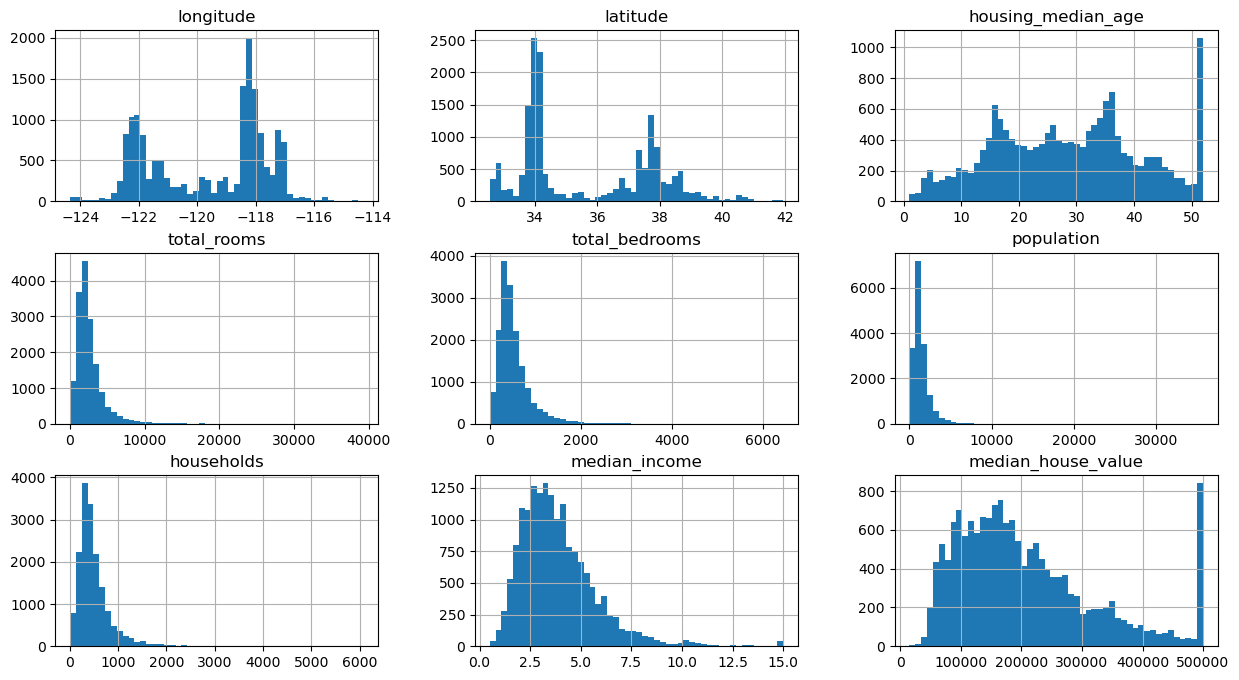

In [18]:
# Plot the histogram of the training data
train_data.hist(bins=50, figsize=(15, 8))

<Axes: >

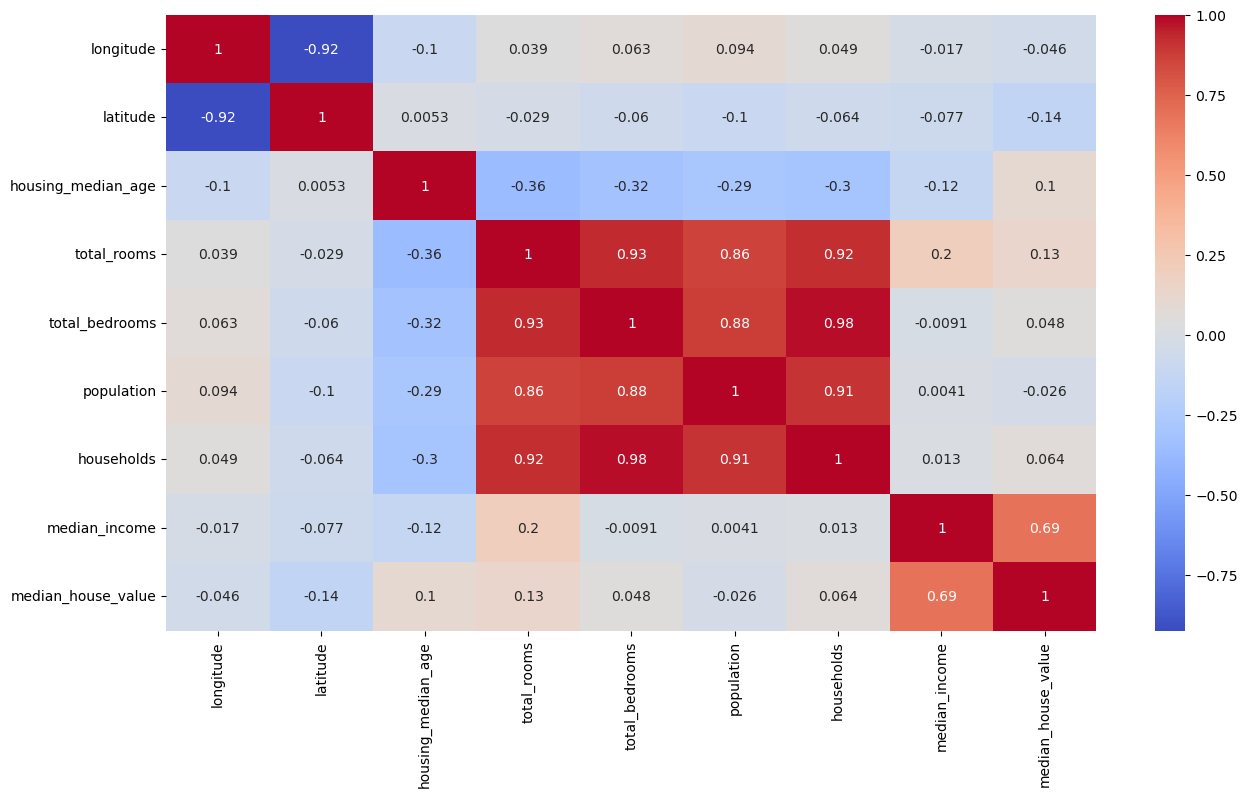

In [19]:
# Plot the heatmap of the correlation matrix of the training data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [20]:
# Log transformation of the features which are right skewed

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

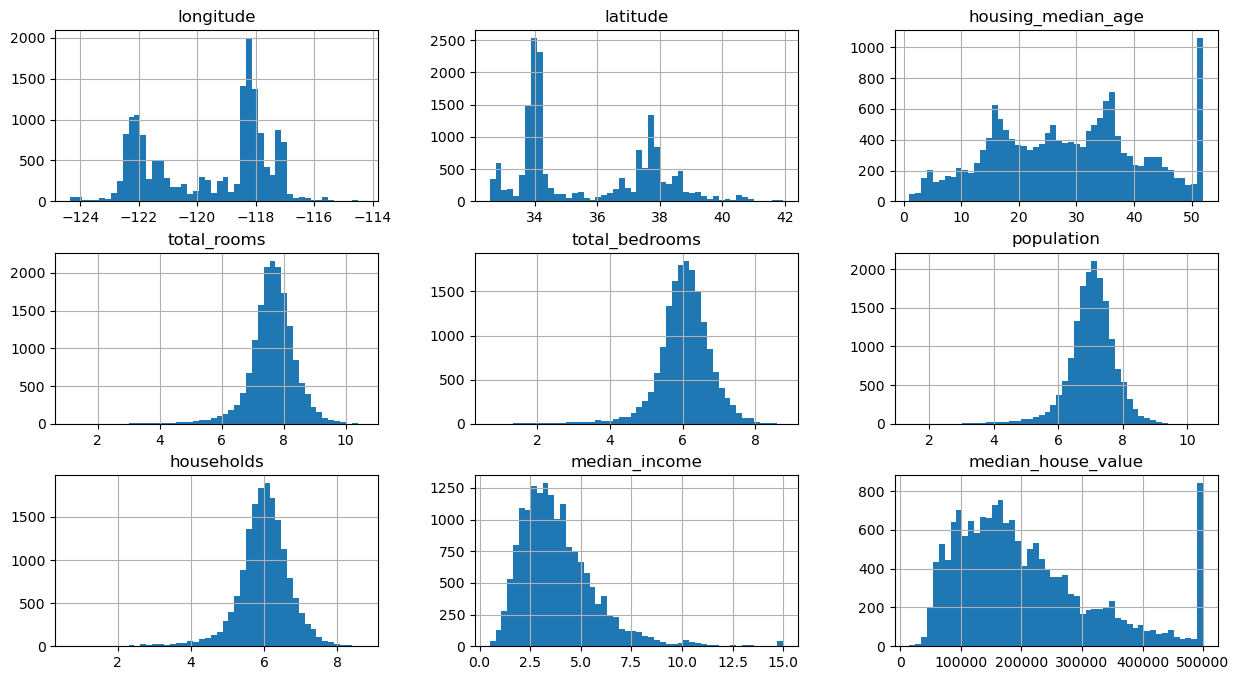

In [21]:
# Plot the histogram of the training data after log transformation
train_data.hist(bins=50, figsize=(15, 8))

In [22]:
# Value counts of the ocean_proximity column in the training data
train_data.ocean_proximity.value_counts()

# One hot encoding of the ocean_proximity column in the training data
dummies_train = pd.get_dummies(train_data.ocean_proximity).astype(int)
train_data = train_data.join(dummies_train).drop('ocean_proximity', axis=1)

In [23]:
# Value counts of the ocean_proximity column in the test data
test_data.ocean_proximity.value_counts()

# One hot encoding of the ocean_proximity column in the test data
dummies_test = pd.get_dummies(test_data.ocean_proximity).astype(int)
test_data = test_data.join(dummies_test).drop('ocean_proximity', axis=1)

<Axes: >

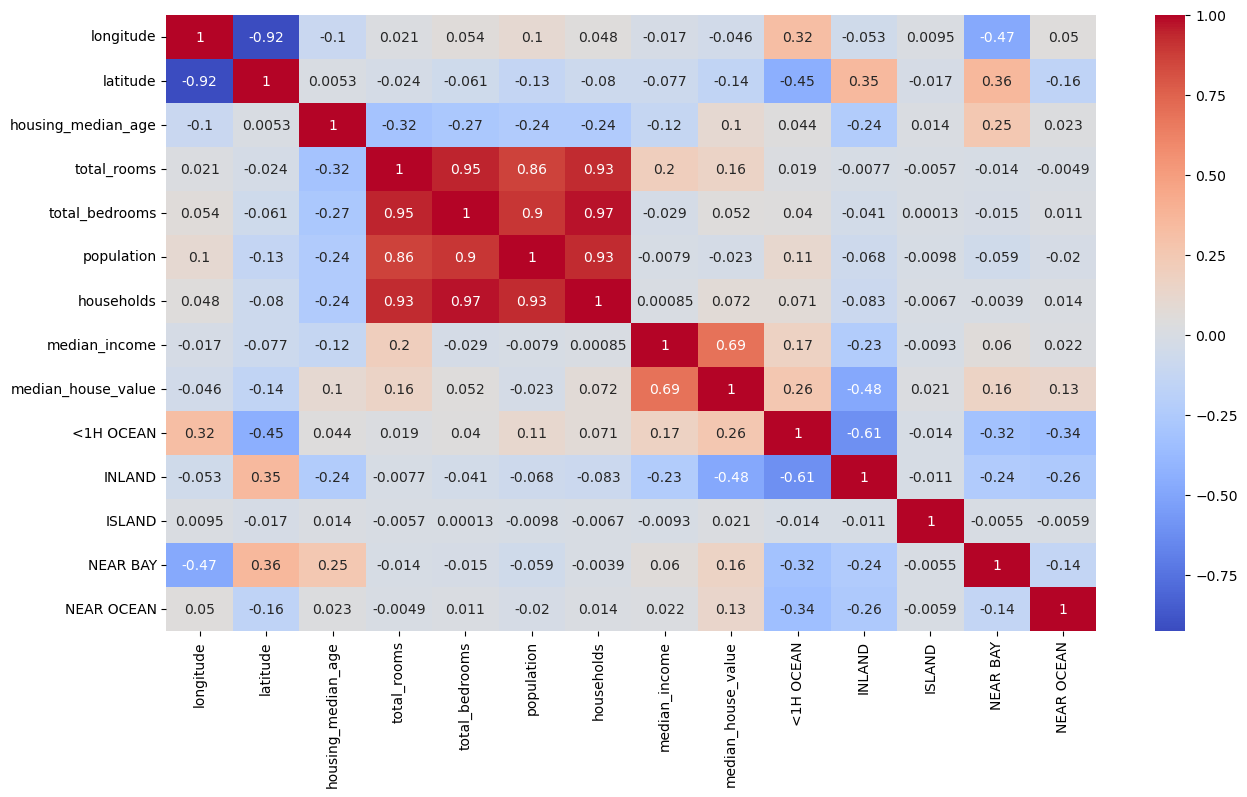

In [24]:
# Plot the heatmap of the correlation matrix of the training data after one hot encoding
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

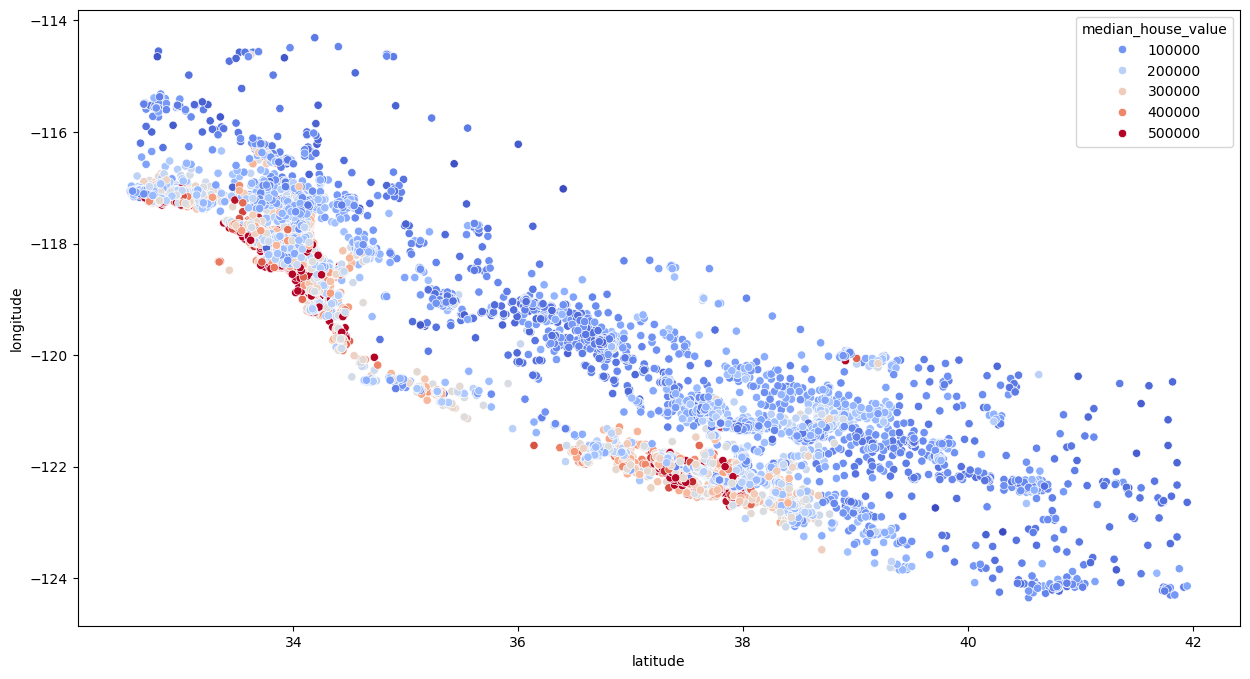

In [25]:
# Plot the scatter plot of latitude and longitude with median_house_value
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

### Feature Engineering

In [26]:
# New Features 'bedroom_ratio', and 'household_rooms' are created in the training data

train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

In [27]:
# New Features 'bedroom_ratio', and 'household_rooms' are created for the test data

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]

<Axes: >

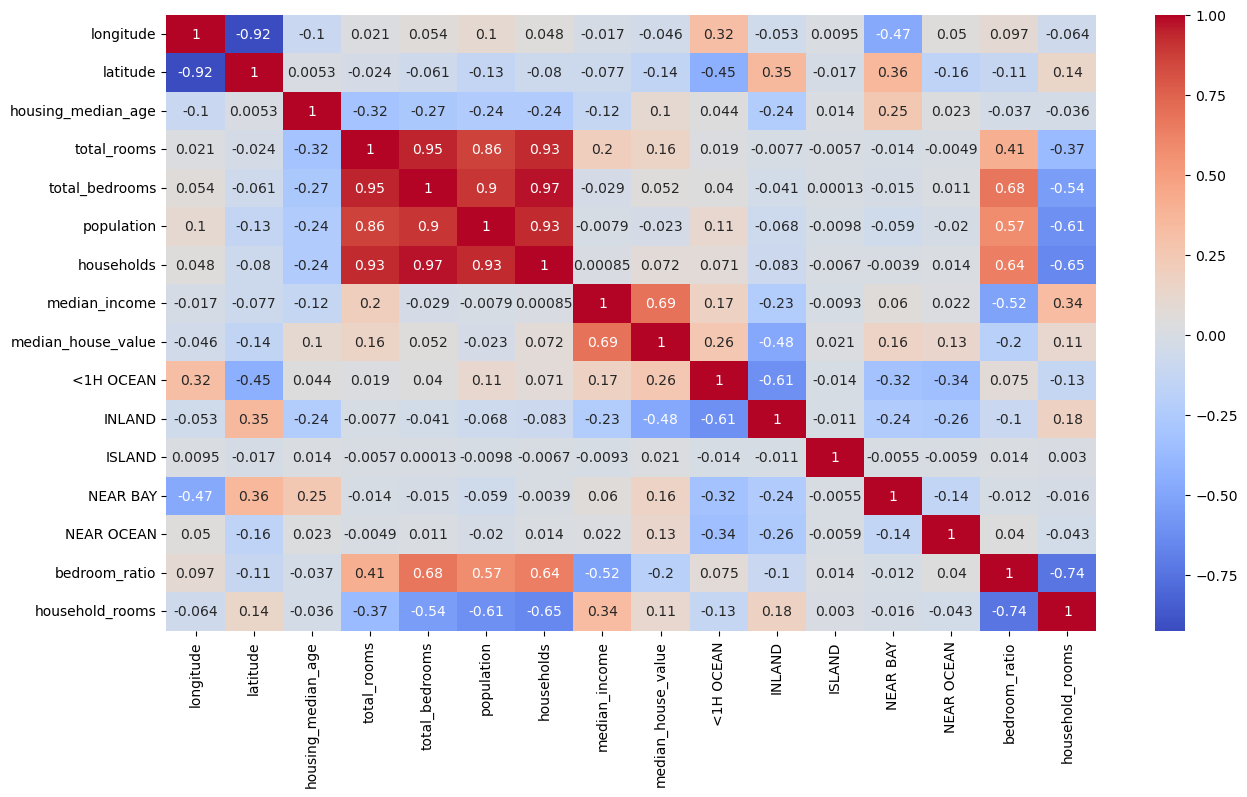

In [28]:
# Heatmap of the correlation matrix with new features in the training data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

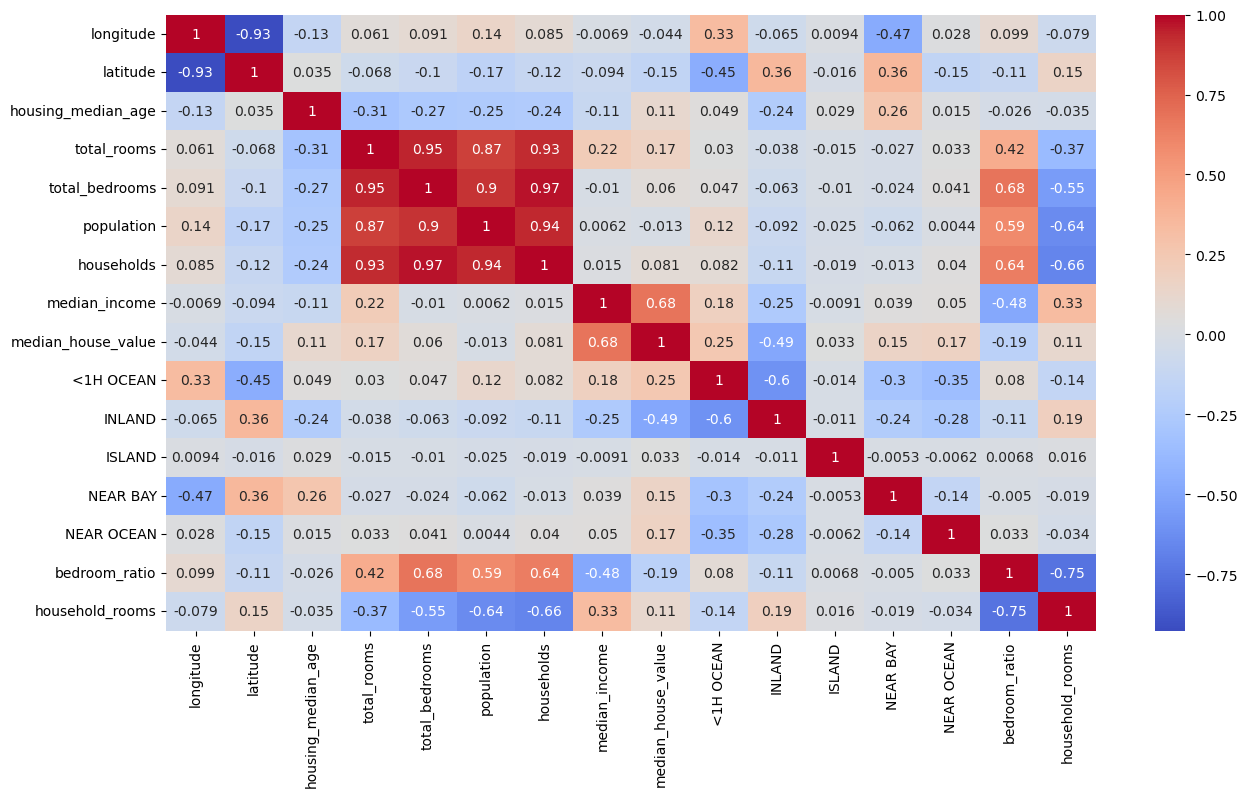

In [29]:
# Heatmap of the correlation matrix with new features in the test data
plt.figure(figsize=(15, 8))
sns.heatmap(test_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Saving the Training and Test data as a csv file

In [30]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)    
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)